In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
import numpy as np
from scipy import stats

In [2]:
#Import crime data
filepath = r'Resources\UCR76_17.csv'
crime_df = pd.read_csv(filepath)

In [3]:
#Import income data (2017)
filepath1 = r'Resources\kaggle_income2.xlsx'
income_df = pd.read_excel(filepath1)
#view income data
income_df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [4]:
#filter crime data for year 2017 to match the income data
crime_df = crime_df.loc[crime_df['YEAR']==2017]

In [5]:
#Split of the state abbreviation from each of the counties on the crime dataframe
crime_df['County1'] = crime_df['County'].str.split(',').str[0]

In [6]:
# Add county to the end of each county entry in the crime dataframe to match the format of the income dataframe
crime_df['County'] = crime_df['County1'] + " " + 'County'

In [7]:
#Pivot on County and sum the murders to get the total amount of murders for the whole county
crime_df2 = crime_df.groupby(['County','State']).sum()[['MRD','CLR']]
#view the new table
crime_df2.head()

,,MRD,CLR
County,State,,
Abbeville County,South Carolina,1,0
Acadia County,Louisiana,7,4
Accomack County,Virginia,3,3
Ada County,Idaho,3,2
Adair County,Kentucky,2,2


In [8]:
#rename the State column on the income dataframe
income_df = income_df.rename(columns={'State_Name': 'State'})

In [9]:
#pivot the income data on County and State and grab the average salary by County
income_df2 = income_df.groupby(['County','State']).mean()['Mean']

In [10]:
#combine the crime dataframe and the income dataframe on their shared indices
combined_df2 = pd.merge(crime_df2, income_df2, left_index=True, right_index=True)
#pop out the index
combined_df2 = combined_df2.reset_index()
#view the new merged dataframe
combined_df2.head()

,County,State,MRD,CLR,Mean
0,Abbeville County,South Carolina,1,0,56507.667464
1,Accomack County,Virginia,3,3,79689.473973
2,Ada County,Idaho,3,2,57745.826772
3,Adair County,Kentucky,2,2,55499.625000
4,Adair County,Missouri,1,1,58124.035533


In [11]:
#Read in population data
population_by_county = pd.read_excel(r'Resources\population_by_county.xlsx')
#rename columns
population_by_county = population_by_county.rename(columns={'Geography':'State', 
                                                            'Geography.2':'County','Population Estimate - April 1, 2010 Estimates Base':'Population'})

In [12]:
#view population data
population_by_county.head()

,Id,Id2,State,Target Geo Id,Target Geo Id2,Geography.1,County,Population,"Population Estimate - July 1, 2017","Change, 2010 to 2017 - Number","Change, 2010 to 2017 - Percent [1]","Rankings - Population Estimate - April 1, 2010 Estimates Base","Rankings - Population Estimate - July 1, 2017","Rankings - Change, 2010 to 2017 - Number","Rankings - Change, 2010 to 2017 - Percent"
0,0400000US01,1,Alabama,0400000US01,1,Alabama,Alabama,4780135,4874747,94612,2.0,(X),(X),(X),(X)
1,0400000US01,1,Alabama,0500000US01001,1001,Alabama - Autauga County,Autauga County,54571,55504,933,1.7,23,24,14,15
2,0400000US01,1,Alabama,0500000US01003,1003,Alabama - Baldwin County,Baldwin County,182265,212628,30363,16.7,7,6,1,1
3,0400000US01,1,Alabama,0500000US01005,1005,Alabama - Barbour County,Barbour County,27457,25270,-2187,-8.0,39,41,61,61
4,0400000US01,1,Alabama,0500000US01007,1007,Alabama - Bibb County,Bibb County,22919,22668,-251,-1.1,45,45,30,31


In [13]:
#pivot the population dataframe on the County and State and sum the population 
new_population_df = population_by_county.groupby(['County','State']).sum()[['Population','Id2']]
#pop out the county and state from the index
new_population_df = new_population_df.reset_index()
#view the dataframe
new_population_df.head()

,County,State,Population,Id2
0,Abbeville County,South Carolina,25416,45
1,Acadia Parish,Louisiana,61770,22
2,Accomack County,Virginia,33164,51
3,Ada County,Idaho,392377,16
4,Adair County,Iowa,7682,19


In [14]:
#merge the population dataframe with the other combined dataframe
combined_df3 = pd.merge(combined_df2, new_population_df, left_on = ['County','State'], right_on = ['County','State'])
#Eliminate the unecessary rows
combined_df3 = combined_df3[['County', 'State', 'MRD', 'Mean', 'Population']]
#Rename the columns
combined_df3 = combined_df3.rename(columns={'Mean':'Average Household Income', 'Population':'Population (Estimate)'})

In [15]:
# Create new column murder rate per 100,000 people
combined_df3['Murder Rate per 100,000'] = (combined_df3['MRD']/ combined_df3['Population (Estimate)'])*100000
#Sort the values in descending order by murder rate to see the most dangerous counties
combined_df3.sort_values(by = 'MRD', ascending = False).head(10)

,County,State,MRD,Average Household Income,Population (Estimate),"Murder Rate per 100,000"
183,Cook County,Illinois,733,70415.684211,5195075,14.109517
456,Los Angeles County,California,580,80469.625000,9818696,5.907098
326,Harris County,Texas,376,90458.500000,4093244,9.185868
834,Wayne County,Michigan,302,73988.333333,1820573,16.588184
480,Maricopa County,Arizona,251,75077.000000,3817361,6.575223
155,Clark County,Nevada,238,55938.000000,1951269,12.197191
205,Dallas County,Texas,207,98983.333333,2366776,8.746075
514,Miami-Dade County,Florida,188,85332.222222,2498018,7.525967
714,Shelby County,Tennessee,185,117661.000000,927683,19.942157
367,Jackson County,Missouri,170,66809.500000,674124,25.217912


# T-Test Data

In [16]:
#add quartile columns for barchart
combined_df3['income_quartile'] = pd.qcut(combined_df3['Average Household Income'], 4, ['q1','q2','q3','q4'])
# combined_df3['Mean'].quantile([.1, .25, .5, .75], axis = 0)
combined_df3.head()

,County,State,MRD,Average Household Income,Population (Estimate),"Murder Rate per 100,000",income_quartile
0,Abbeville County,South Carolina,1,56507.667464,25416,3.934529,q3
1,Accomack County,Virginia,3,79689.473973,33164,9.045953,q4
2,Ada County,Idaho,3,57745.826772,392377,0.764571,q3
3,Adair County,Kentucky,2,55499.625000,18655,10.720986,q2
4,Adair County,Missouri,1,58124.035533,25607,3.905182,q3


In [17]:
combined_df3['Murder Rate per 100,000']= (combined_df3['MRD']/combined_df3['Population (Estimate)'])*100000
test_df = combined_df3.groupby('income_quartile').sum()[['Murder Rate per 100,000', 'MRD']]
test_df

,"Murder Rate per 100,000",MRD
income_quartile,,
q1,1784.716479,1253
q2,1240.544553,1578
q3,1141.868757,3011
q4,1019.411783,5909


In [28]:
test_df['expected'] = sum(test_df['Murder Rate per 100,000'])/4
test_df = test_df.reset_index()
test_df

,income_quartile,"Murder Rate per 100,000",MRD,expected
0,q1,1784.716479,1253,1296.635393
1,q2,1240.544553,1578,1296.635393
2,q3,1141.868757,3011,1296.635393
3,q4,1019.411783,5909,1296.635393


# Statistical Test

We are interested in determining whether average income has a relation to the murder rate per 100,000. Our null hypothesis is that murder is not related to income and therefore each quartile of the population should have the same murder rate per 100,000. 

In [19]:
#Chi Squared Test
critical_value = stats.chi2.ppf(q = 0.95, df = 2)

In [20]:
critical_value

5.991464547107979

In [21]:
stats.chisquare(test_df['Murder Rate per 100,000'], test_df['expected'])

Power_divergenceResult(statistic=263.8945166887602, pvalue=6.461383259488625e-57)

Since our chi-square value is greater than the critical value (263 vs 5.99) we reject the null hypothesis and conclude that income may have an affect on murder rates

# Graphs

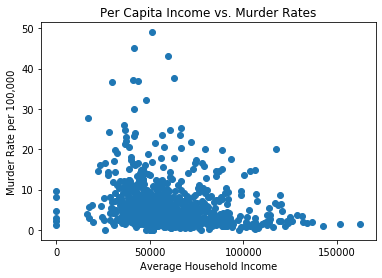

In [22]:
plt.scatter(combined_df3['Average Household Income'], combined_df3['Murder Rate per 100,000'])
plt.ylabel('Murder Rate per 100,000')
plt.xlabel('Average Household Income')
plt.title('Per Capita Income vs. Murder Rates')
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size':18})


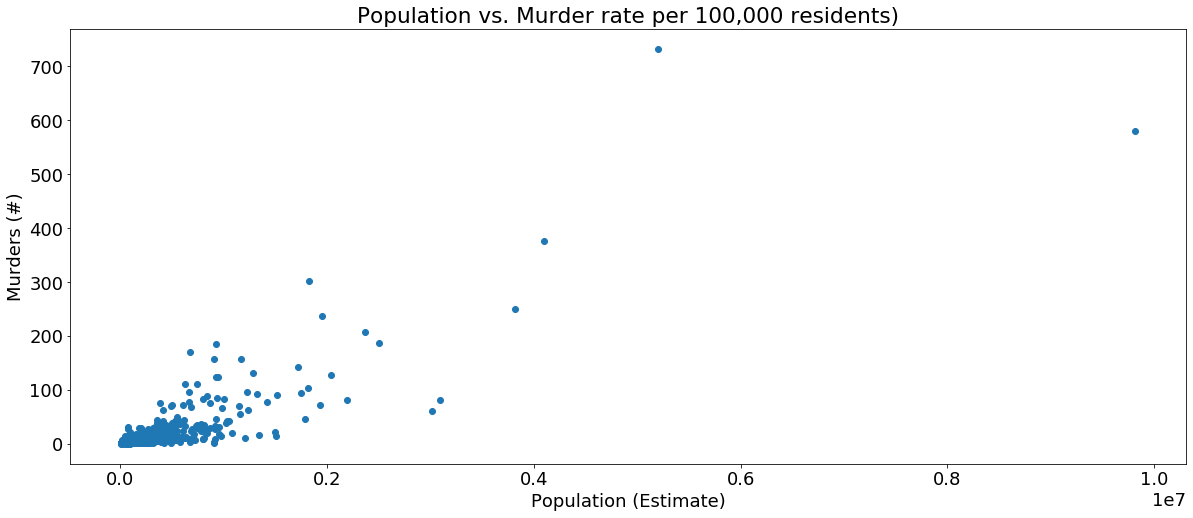

In [23]:
plt.scatter(combined_df3['Population (Estimate)'], combined_df3['MRD'])
plt.ylabel('Murders (#)')
plt.xlabel('Population (Estimate)')
plt.title('Population vs. Murder rate per 100,000 residents)')
plt.rcParams.update({'font.size':18})

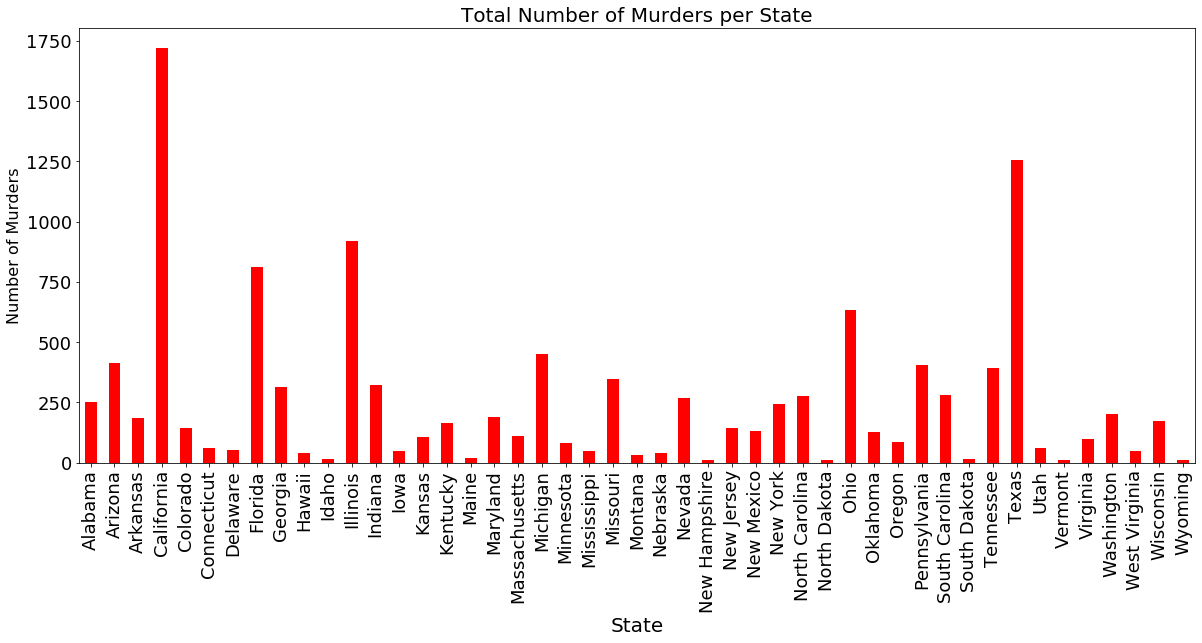

In [24]:
# Serenas Charts
#Combined Murder data by state
State_total = combined_df2.groupby("State")['MRD'].sum()
State_total
#Bar chart
Bar_chart = State_total.plot(kind='bar', color='red', fontsize=18)
Bar_chart.set_title("Total Number of Murders per State", fontsize=20)
Bar_chart.set_xlabel("State", fontsize=20)
Bar_chart.set_ylabel("Number of Murders", fontsize =16)
plt.rcParams["figure.figsize"] = (20,8)

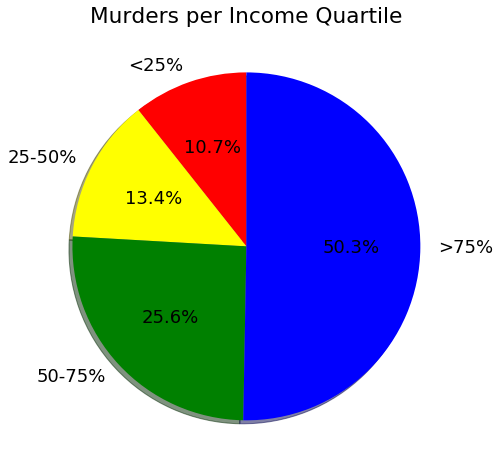

In [25]:
slices = [1253,1578,3011,5909]
income_quartile = ['<25%', '25-50%', '50-75%', '>75%']
col = ['red','yellow','green','blue']
plt.pie(slices,
       labels=income_quartile,
       colors=col,
       startangle=90,
       shadow=True,
       explode=(0,0,0,0),
        autopct='%1.1f%%')
plt.title("Murders per Income Quartile")
plt.rcParams.update({'font.size':18})
plt.show()

In [30]:
test_df.head()

,income_quartile,"Murder Rate per 100,000",MRD,expected
0,q1,1784.716479,1253,1296.635393
1,q2,1240.544553,1578,1296.635393
2,q3,1141.868757,3011,1296.635393
3,q4,1019.411783,5909,1296.635393


<BarContainer object of 4 artists>

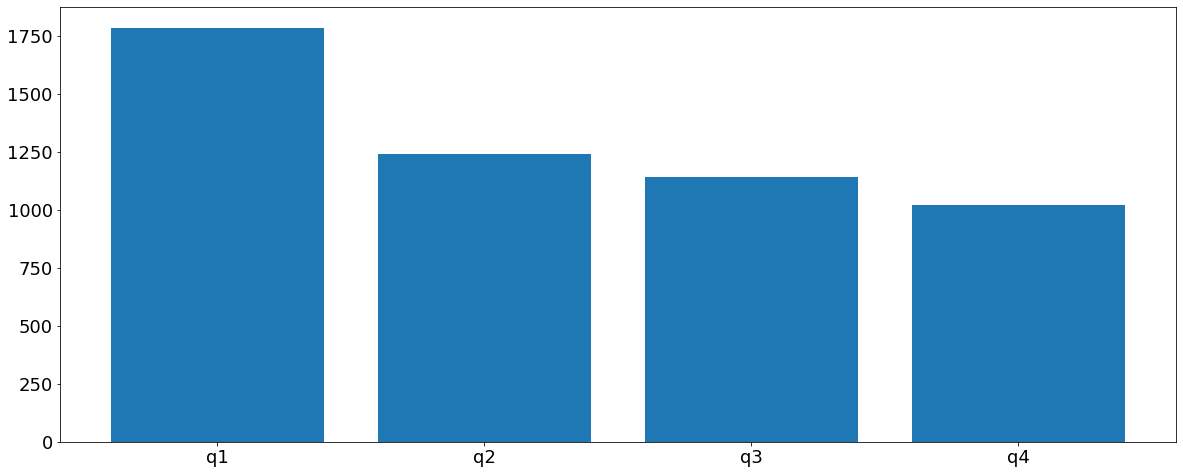

In [31]:
plt.bar(test_df['income_quartile'], test_df['Murder Rate per 100,000'])